# LINEAR REGRESSION

In [1350]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
pd.options.mode.chained_assignment = None  # default='warn'

In [1351]:
df1=pd.read_csv('cubic_zirconia.csv')

In [1352]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1353]:
df1.shape

(26967, 11)

In [1354]:
df1=df1.iloc[: , 1:]

In [1355]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1356]:
df1.shape

(26967, 10)

In [1357]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [1358]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [1359]:
df1.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [1360]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [1361]:
# df1=df1.dropna()

In [1362]:
depth_mean=df1.depth.mean()
df1['depth']=df1['depth'].fillna(depth_mean)

In [1363]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [1364]:
df1.duplicated().sum()

34

In [1365]:
df1.shape

(26967, 10)

In [1366]:
df1.drop_duplicates(inplace=True)

In [1367]:
df1.shape

(26933, 10)

In [1368]:
df1.duplicated().sum()

0

In [1369]:
# df1.loc[(df1['x']==0) | (df1['y']==0) | (df1['z']==0)]

In [1370]:

df1[(df1['x']==0)|(df1['y']==0)|(df1['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [1371]:
df1.drop(df1[(df1['x']==0)|(df1['y']==0)|(df1['z']==0)].index, inplace=True)

In [1372]:
df1.shape

(26925, 10)

In [1373]:
df1.reset_index(inplace=True,drop=True)

In [1374]:
df1.rename(columns = {'x':'length', 'y':'width', 'z':'height'}, inplace = True)

In [1375]:
for i in df1.select_dtypes(['object']):
    print('\n', df1.value_counts(i))


 cut
Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
dtype: int64

 color
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
dtype: int64

 clarity
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
dtype: int64


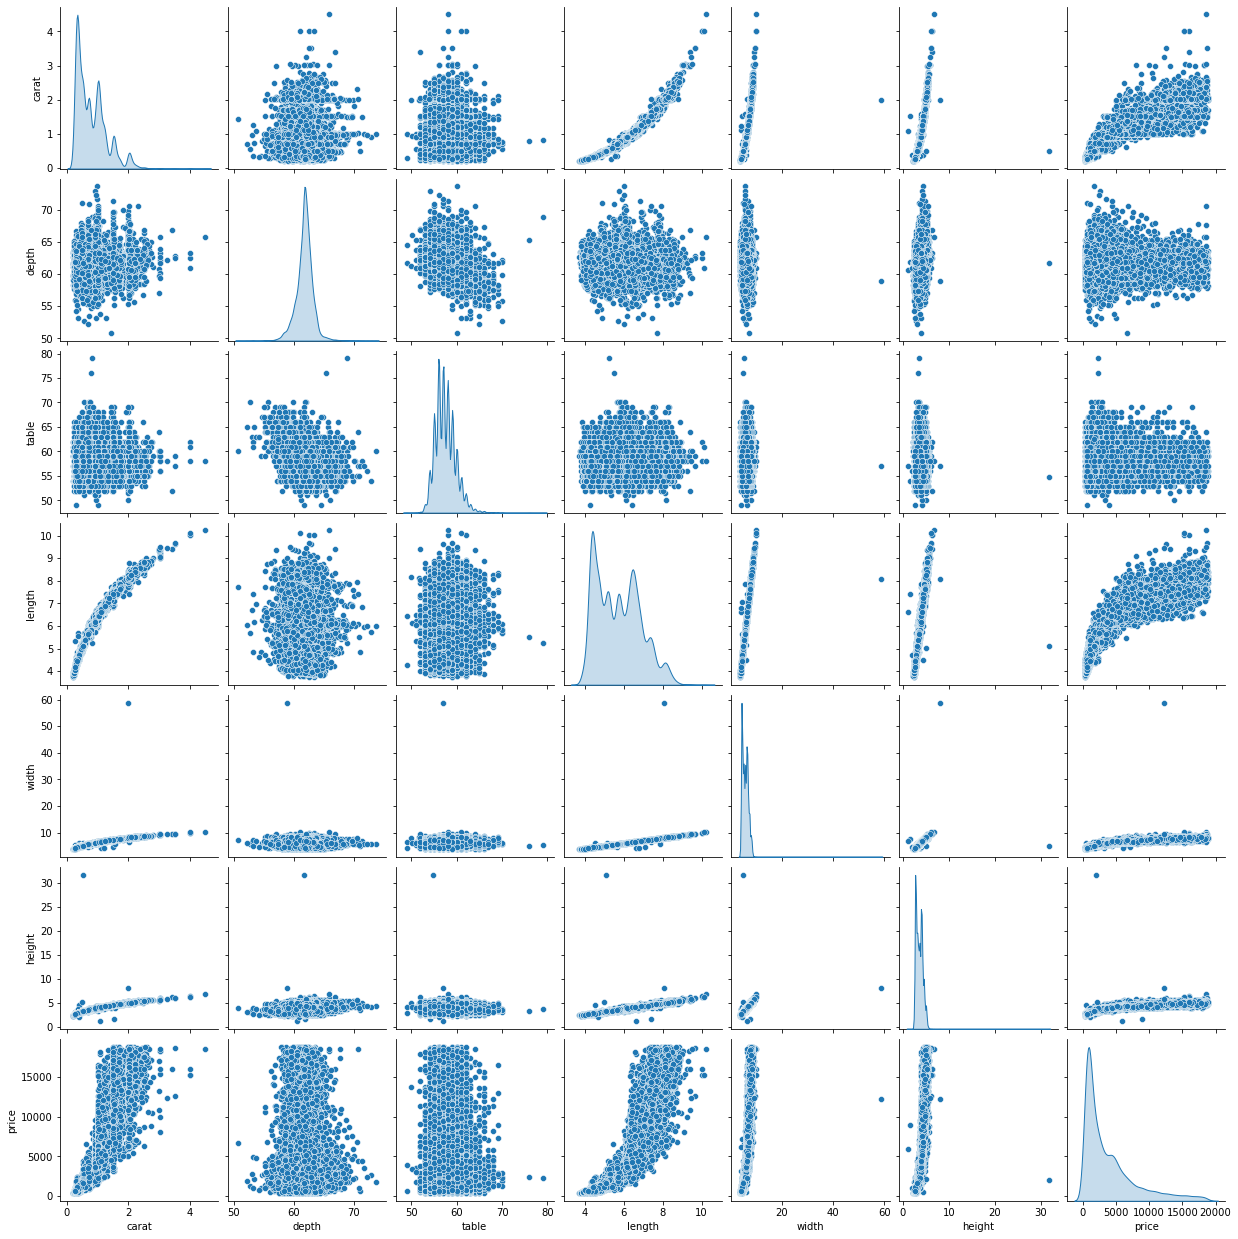

In [1376]:
sns.pairplot(df1.iloc[:,0:10],diag_kind='kde')

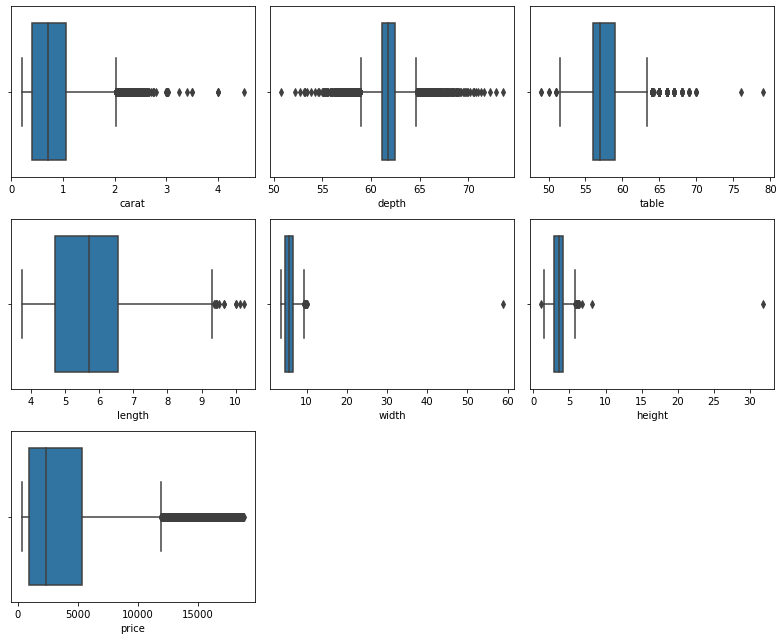

In [1377]:
plot = df1.iloc[:,[0,4,5,6,7,8,9]]
fig=plt.figure(figsize=(11,9))
for i in range(0,len(plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(x= plot[plot.columns[i]])
plt.tight_layout()
plt.show()

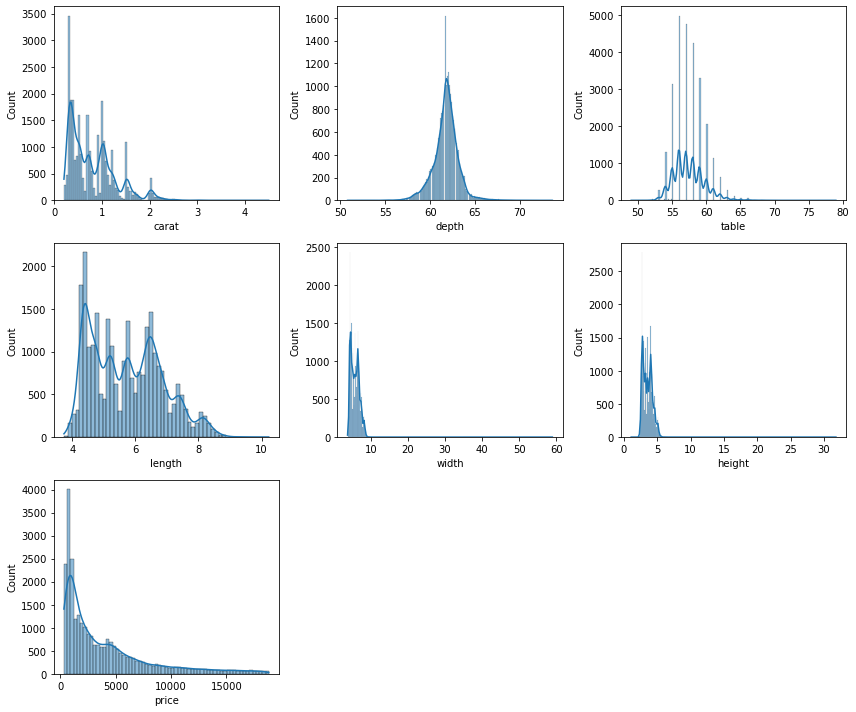

In [1378]:
plot=df1.iloc[:,[0,4,5,6,7,8,9]]
fig=plt.figure(figsize=(12,10))
for i in range(0,len(plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.histplot(x=plot[plot.columns[i]], kde=True)
plt.tight_layout()
plt.show()

<AxesSubplot:>

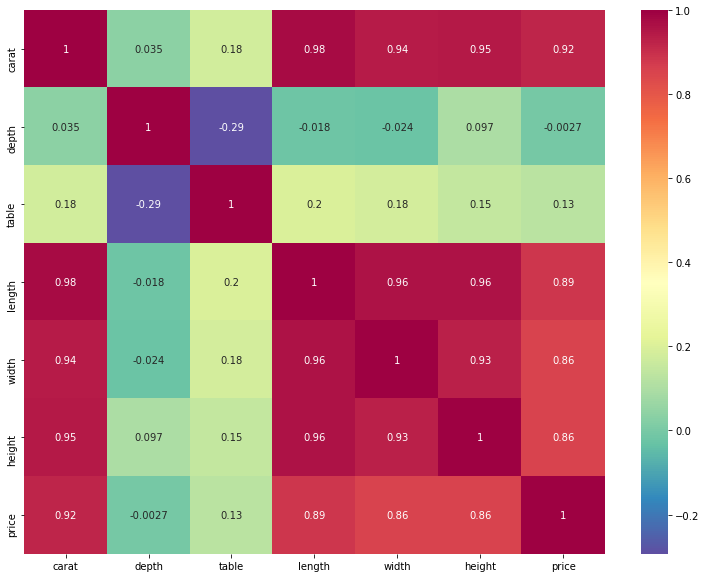

In [1136]:
plt.figure(figsize=(13,10))
sns.heatmap(df1.iloc[:,0:10].corr(), annot=True, cmap='Spectral_r')

In [1379]:
q1 = df1.quantile(.10)
q3 = df1.quantile(.90)
IQR = q3-q1
ur = q3+(1.5*IQR)
lr = q1-(1.5*IQR)

In [1380]:
df1['carat'].quantile(.90)

1.51

In [1381]:
ur

carat         3.310
depth        67.850
table        67.500
length       11.750
width        11.735
height        7.265
price     23800.000
dtype: float64

In [1382]:
lr

carat        -1.490
depth        55.450
table        47.500
length       -0.090
width        -0.065
height       -0.055
price    -13252.800
dtype: float64

In [1383]:
print('Carat upper range rows',len(df1[df1['carat']> ur[0]]))
print('Depth upper range rows',len(df1[df1['depth']> ur[1]]))
print('Table upper range rows',len(df1[df1['table']> ur[2]]))
print('length upper range rows',len(df1[df1['length']> ur[3]]))
print('width upper range rows',len(df1[df1['width']> ur[4]]))
print('height upper range rows',len(df1[df1['height']> ur[5]]))

Carat upper range rows 7
Depth upper range rows 47
Table upper range rows 30
length upper range rows 0
width upper range rows 1
height upper range rows 2


In [1384]:
print('carat lower range rows',len(df1[df1['carat']< lr[0]]))
print('Depth lower range rows',len(df1[df1['depth']< lr[1]]))
print('Table lower range rows',len(df1[df1['table']< lr[2]]))
print('length lower range rows',len(df1[df1['length']< lr[3]]))
print('width lower range rows',len(df1[df1['width']< lr[4]]))
print('height lower range rows',len(df1[df1['height']< lr[5]]))

carat lower range rows 0
Depth lower range rows 22
Table lower range rows 0
length lower range rows 0
width lower range rows 0
height lower range rows 0


In [1385]:
def rem_outliers(cols):
    x = []
    q1 = df1[cols].quantile(.10)
    q3 = df1[cols].quantile(.90)
    IQR = q3-q1
    ur = float(q3+(1.5*IQR))
    lr = float(q1-(1.5*IQR))

    for i in df1[cols]:
        if i > ur:
            i = ur
        elif i < lr:
            i = lr
        else:
            i=i
        x.append(i)
    return x

for attr in df1.select_dtypes(exclude='object').columns:
    df1[attr] = rem_outliers(attr)

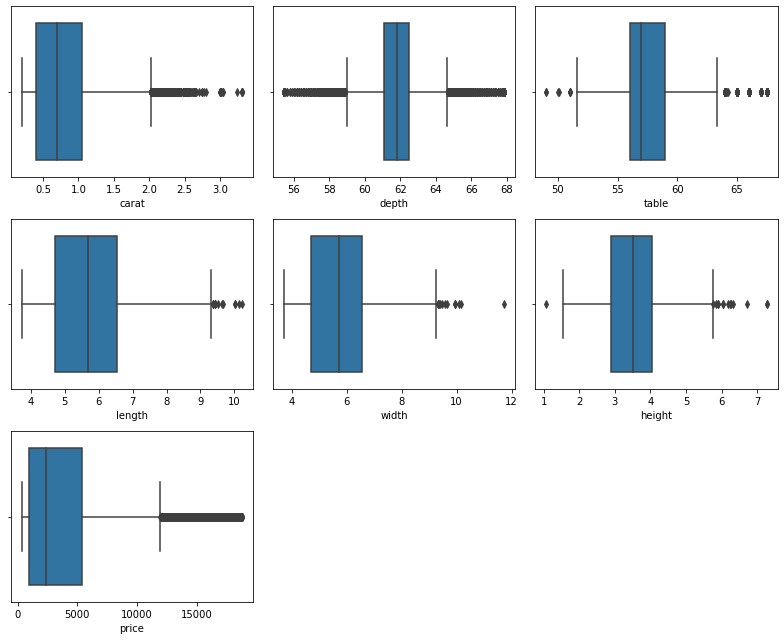

In [1386]:
plot = df1.iloc[:,[0,4,5,6,7,8,9]]
fig=plt.figure(figsize=(11,9))
for i in range(0,len(plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(x= plot[plot.columns[i]])
plt.tight_layout()
plt.show()

In [1282]:
df1.describe()

,carat,depth,table,length,width,height,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797681,61.743941,57.453374,5.729385,5.731400,3.537880,3936.249991
std,0.476234,1.373997,2.220462,1.126081,1.118402,0.696698,4020.983187
min,0.200000,55.450000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,3.310000,67.850000,67.500000,10.230000,11.735000,7.265000,18818.000000


In [1387]:
df1a=df1.copy()

In [1388]:
df1a['total_size']=df1a['length']*df1a['width']*df1a['height']

In [1389]:
df1a.drop(['length','width','height'],axis=1,inplace=True)

In [1390]:
df1a.head()

,carat,cut,color,clarity,depth,table,price,total_size
0,0.30,Ideal,E,SI1,62.1,58.0,499,48.726678
1,0.33,Premium,G,IF,60.8,58.0,984,53.225640
2,0.90,Very Good,E,VVS2,62.2,60.0,6289,139.726944
3,0.42,Ideal,F,VS1,61.6,56.0,1082,68.482560
4,0.31,Ideal,F,VVS1,60.4,59.0,779,51.066825


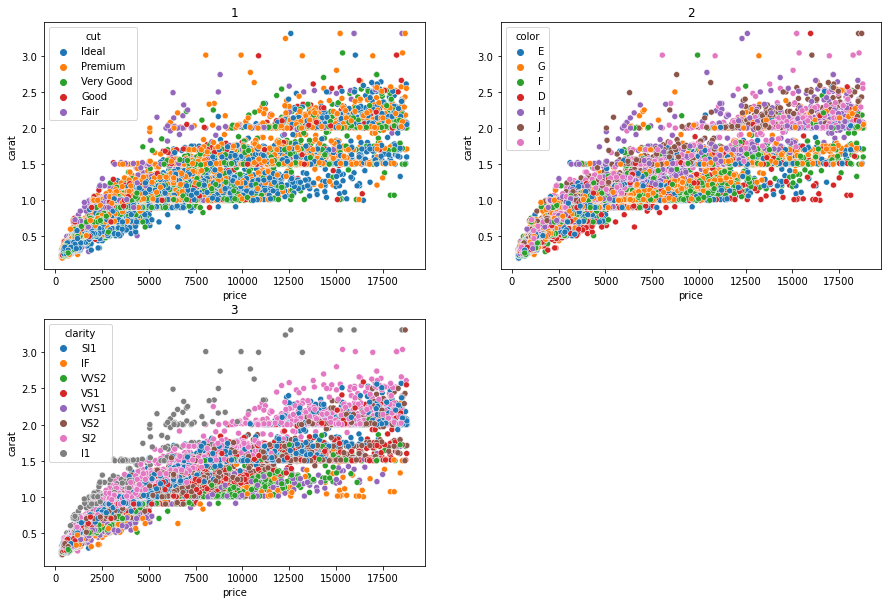

In [1391]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(x='price',y='carat',hue='cut', data=df1a, ax=axs[0,0]).set_title(1)
sns.scatterplot(x='price',y='carat', hue='color',data=df1a, ax=axs[0,1]).set_title(2)
sns.scatterplot(x='price',y='carat', hue='clarity',data=df1a, ax=axs[1,0]).set_title(3)
fig.delaxes(axs[1,1])

Text(0.5, 1.0, '9')

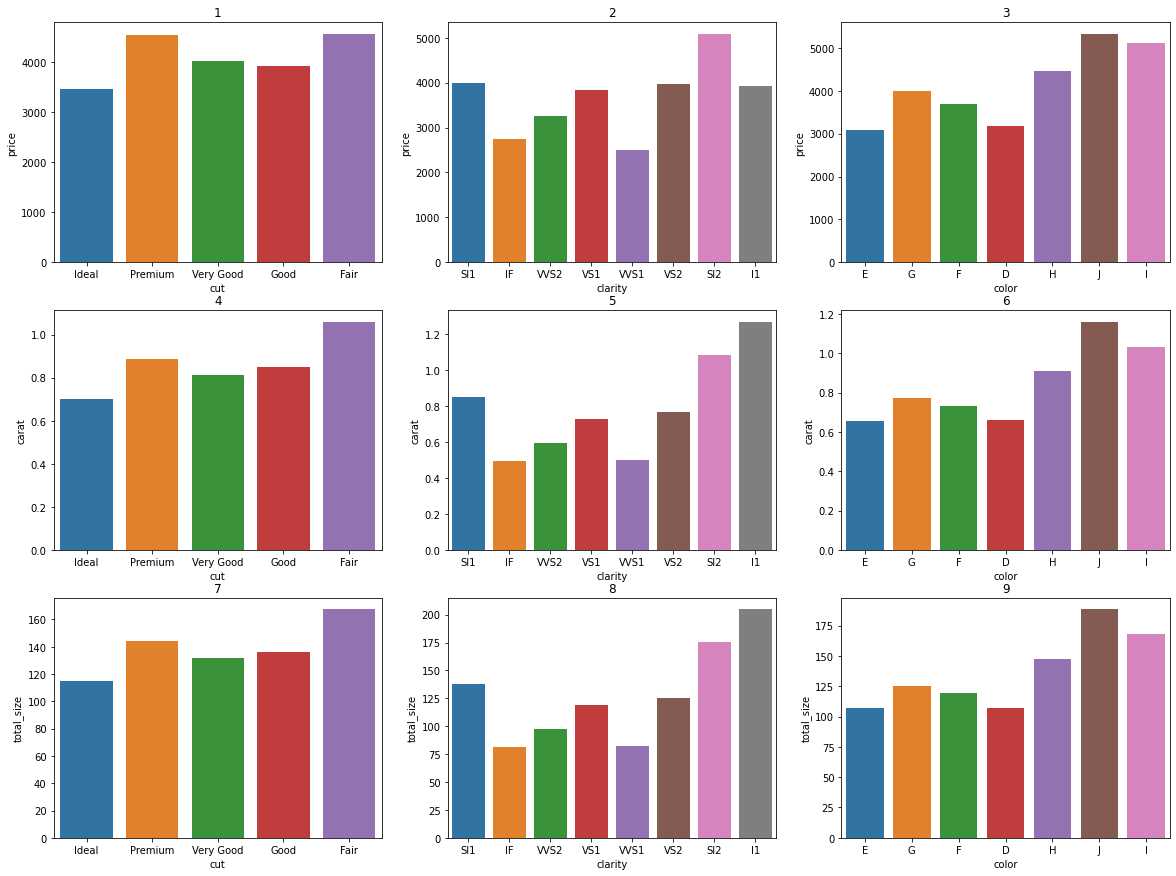

In [1392]:
fig, axs = plt.subplots(3,3,figsize=(20,15))
sns.barplot(x='cut', y='price', data=df1a, ci=None,ax=axs[0,0]).set_title(1)
sns.barplot(x='clarity', y='price', data=df1a,ci=None,ax=axs[0,1]).set_title(2)
sns.barplot(x='color', y='price', data=df1a,ci=None,ax=axs[0,2]).set_title(3)
sns.barplot(x='cut', y='carat', data=df1a, ci=None,ax=axs[1,0]).set_title(4)
sns.barplot(x='clarity', y='carat', data=df1a,ci=None,ax=axs[1,1]).set_title(5)
sns.barplot(x='color', y='carat', data=df1a,ci=None,ax=axs[1,2]).set_title(6)
sns.barplot(x='cut', y='total_size', data=df1a, ci=None,ax=axs[2,0]).set_title(7)
sns.barplot(x='clarity', y='total_size', data=df1a,ci=None,ax=axs[2,1]).set_title(8)
sns.barplot(x='color', y='total_size', data=df1a,ci=None,ax=axs[2,2]).set_title(9)

In [1393]:
pd.crosstab(df1a.clarity,[df1a.cut, df1a.color],margins=True, 
            margins_name= 'Total').T

clarity           I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2  Total
cut       color                                                     
Fair      D        1    2    27    22     2    14     1     5     74
          E        3    0    27    40     5    17     1     7    100
          F       15    1    43    36    16    27     4     6    148
          G       24    1    28    37    25    20     2     9    146
          H       23    0    35    43    18    25     0     5    149
          I       13    0    14    26    18    17     1     5     94
          J       10    0    19    20     8     9     1     1     68
Good      D        5    4   109   111    22    43     6    11    311
          E       14    7   183   102    49    76    30    29    490
          F       12    5   139    88    74    98    14    22    452
          G        7    8    95    75    73    99    23    38    418
          H        5    1   117    78    40    72    13    25    351
          I        6    1    77    41    46    54    13    14    252
          J        1    4    44    31    26    49     1     4    160
Ideal     D        9   16   362   177   178   439    76   152   1409
          E        9   45   404   252   277   549   171   259   1966
          F       17  128   306   208   309   443   222   258   1891
          G        8  252   348   239   475   468   301   372   2463
          H       22  111   352   250   241   273   159   142   1550
          I        8   46   256   139   202   233    94    95   1073
          J        1   12   118    59    99   122    13    29    453
Premium   D        8    5   295   209    77   153    17    42    806
          E       14   13   314   246   153   319    56    59   1174
          F       18   18   318   249   138   309    39    75   1164
          G       19   40   280   249   282   394    87   118   1469
          H       25   23   306   247   163   273    58    60   1155
          I       16   11   187   160   108   144    37    44    707
          J        6    5   108    81    75   100    13    17    405
Very Good D        2   11   246   150    90   155    21    66    741
          E       13   22   321   209   141   241    84   155   1186
          F        5   30   282   168   135   229    81   137   1067
          G        9   39   247   177   220   224    94   144   1154
          H        6   14   270   174   131   159    58    74    886
          I        5   11   190   101   106   152    38    36    639
          J        3    5    97    67    64    93    10    15    354
Total            362  891  6564  4561  4086  6092  1839  2530  26925

In [1394]:
df1a['Carat_Range']=pd.cut(df1a['carat'],bins=[0.1,1,2,3,4],
                          labels=['Less than 1ct','1ct to 2ct','2.1ct to 3ct','3ct to 4ct'])

In [1395]:
df1a.head()

,carat,cut,color,clarity,depth,table,price,total_size,Carat_Range
0,0.30,Ideal,E,SI1,62.1,58.0,499,48.726678,Less than 1ct
1,0.33,Premium,G,IF,60.8,58.0,984,53.225640,Less than 1ct
2,0.90,Very Good,E,VVS2,62.2,60.0,6289,139.726944,Less than 1ct
3,0.42,Ideal,F,VS1,61.6,56.0,1082,68.482560,Less than 1ct
4,0.31,Ideal,F,VVS1,60.4,59.0,779,51.066825,Less than 1ct


In [1396]:
df1a['Carat_Range'].value_counts()

Less than 1ct    18143
1ct to 2ct        7816
2.1ct to 3ct       949
3ct to 4ct          17
Name: Carat_Range, dtype: int64

<AxesSubplot:xlabel='Carat_Range', ylabel='count'>

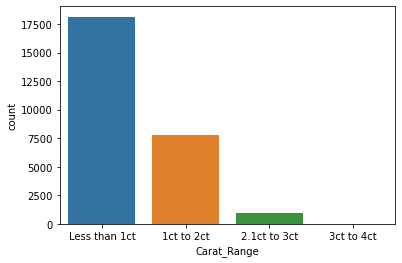

In [1397]:
sns.countplot(x='Carat_Range',data=df1a)

In [1398]:
df1a.groupby(['cut','color','clarity']).size().nlargest()

cut    color  clarity
Ideal  E      VS2        549
       G      VS1        475
              VS2        468
       F      VS2        443
       D      VS2        439
dtype: int64

In [1399]:
df1a['Price_Range']=pd.cut(df1a['price'],
                          bins=[300,1000,2000,4000,8000,10000,15000,19000],
                          labels=['300 to 1000','1001 to 2000','2001 to 4000','4001 to 8000',
                                  '8001 to 10000','10001 to 15000','15001 to 19000'])

In [1400]:
df1a.head()

,carat,cut,color,clarity,depth,table,price,total_size,Carat_Range,Price_Range
0,0.30,Ideal,E,SI1,62.1,58.0,499,48.726678,Less than 1ct,300 to 1000
1,0.33,Premium,G,IF,60.8,58.0,984,53.225640,Less than 1ct,300 to 1000
2,0.90,Very Good,E,VVS2,62.2,60.0,6289,139.726944,Less than 1ct,4001 to 8000
3,0.42,Ideal,F,VS1,61.6,56.0,1082,68.482560,Less than 1ct,1001 to 2000
4,0.31,Ideal,F,VVS1,60.4,59.0,779,51.066825,Less than 1ct,300 to 1000


In [1401]:
df1a.groupby('Price_Range')['price'].max()

Price_Range
300 to 1000        1000
1001 to 2000       2000
2001 to 4000       3999
4001 to 8000       7999
8001 to 10000     10000
10001 to 15000    14998
15001 to 19000    18818
Name: price, dtype: int64

<AxesSubplot:xlabel='Price_Range', ylabel='count'>

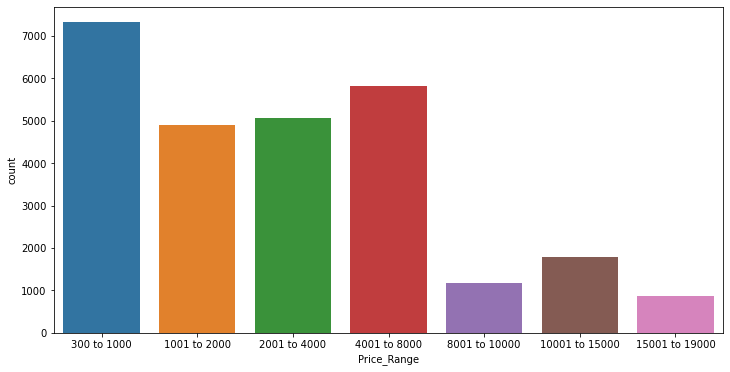

In [1402]:
plt.figure(figsize=(12,6))
sns.countplot(x='Price_Range',data=df1a)

In [1403]:
df1a.drop(['Price_Range','Carat_Range'],axis=1,inplace=True)

In [1404]:
# le=LabelEncoder()

# df1['cut'] = le.fit_transform(df1['cut'])
# df1['color'] = le.fit_transform(df1['color'])
# df1['clarity'] = le.fit_transform(df1['clarity'])

In [1405]:
# # RANK ENCODING

df1a['cut']= df1a['cut'].replace({'Ideal':5,'Premium':4,'Very Good':3, 'Good':2, 'Fair':1})
df1a['color']= df1a['color'].replace({'J':7,'I':6,'H':5,'G':4,'F':3,'E':2,'D':1})
df1a['clarity']= df1a['clarity'].replace({'IF':8,'VVS1':7,'VVS2':6, 'VS1':5, 'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [1406]:
df1a.head()

,carat,cut,color,clarity,depth,table,price,total_size
0,0.30,5,2,3,62.1,58.0,499,48.726678
1,0.33,4,4,8,60.8,58.0,984,53.225640
2,0.90,3,2,6,62.2,60.0,6289,139.726944
3,0.42,5,3,5,61.6,56.0,1082,68.482560
4,0.31,5,3,7,60.4,59.0,779,51.066825


## ITERATION-1

In [1407]:
X = df1a.drop('price', axis=1)

Y = df1a[['price']]

In [1408]:
X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [1409]:
# from scipy.stats import zscore

# X_train_scaled  = X_train.apply(zscore)
# X_test_scaled = X_test.apply(zscore)
# # train_lb_scaled =train_labels.apply(zscore)
# # test_lb_scaled = test_labels.apply(zscore)

In [1410]:
df_tr= pd.concat([X_train,train_labels], axis=1)
df_te=pd.concat([X_test,test_labels], axis=1)
df_tr.head()

,carat,cut,color,clarity,depth,table,total_size,price
5029,1.10,2,2,2,63.3,56.0,178.314710,4065
12098,1.01,3,1,2,64.0,56.0,163.187640,5166
20154,0.67,2,6,4,60.7,61.4,107.701440,1708
4712,0.76,2,4,3,57.7,63.0,125.331195,2447
2548,1.01,4,4,5,62.8,59.0,161.139342,6618


In [1411]:
import statsmodels.formula.api as smf

var='price ~ carat+cut+color+clarity+depth+table+total_size'

In [1412]:
lm1 = smf.ols(formula= var, data = df_tr).fit()
lm1.params

Intercept    -1074.799072
carat         7132.545369
cut            111.574008
color         -325.577644
clarity        527.224141
depth          -29.491958
table          -28.510390
total_size      10.615699
dtype: float64

In [1413]:
print('TRAINING DATASET RESULTS')
print()
print(lm1.summary())

TRAINING DATASET RESULTS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.617e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:46:56   Log-Likelihood:            -1.6074e+05
No. Observations:               18847   AIC:                         3.215e+05
Df Residuals:                   18839   BIC:                         3.216e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1074.7991    7

The condition number is high and this might indicate that there is multicollinearity or other numerical problems.

In [1414]:
lm2 = smf.ols(formula= var, data = df_te).fit()
lm2.params

Intercept    -3117.688912
carat         5267.336129
cut            136.262749
color         -323.036843
clarity        514.718136
depth          -19.243102
table           -4.623186
total_size      22.002093
dtype: float64

In [1415]:
print('TESTING DATASET RESULTS')
print()
print(lm2.summary())

TESTING DATASET RESULTS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.151e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:47:25   Log-Likelihood:                -68884.
No. Observations:                8078   AIC:                         1.378e+05
Df Residuals:                    8070   BIC:                         1.378e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3117.6889   107

In [1416]:
Cond_Tr1= lm1.condition_number
Cond_Tr1

13565.0876870152

In [1417]:
Cond_Te1= lm2.condition_number
Cond_Te1

13713.829439882522

In [1418]:
# MSE Training
mse_tr1 = np.mean((lm1.predict(df_tr.drop('price',axis=1))-df_tr['price'])**2)
mse_tr1

1498087.7472788913

In [1419]:
rmse_tr1=np.sqrt(mse_tr1)
rmse_tr1

1223.9639485209077

In [1420]:
R_Squared_Tr1=((lm1.rsquared)*100).round(2)
print('R-SQUARED VALUE TRAINING:',R_Squared_Tr1)

R-SQUARED VALUE TRAINING: 90.67


In [1421]:
# MSE Testing
mse_te1 = np.mean((lm2.predict(df_te.drop('price',axis=1))-df_te['price'])**2)
mse_te1

1493895.567438068

In [1422]:
rmse_te1=np.sqrt(mse_te1)
rmse_te1

1222.2502065608612

In [1423]:
R_Squared_Te1=((lm2.rsquared)*100).round(2)
print('R-SQUARED VALUE TESTING:',R_Squared_Te1)

R-SQUARED VALUE TESTING: 90.9


In [1424]:
# Prediction on Train data
y_pred_tr = lm1.predict(df_tr)
y_pred_tr.head()

5029     5826.954462
12098    5440.948232
20154    1685.211392
4712     2681.083053
2548     6085.576793
dtype: float64

In [1425]:
# Prediction on Test data
y_pred_te = lm1.predict(df_te)
y_pred_te.head()

11961     8704.087947
3294      5235.609132
25389    14900.032102
709      12482.101592
8006      9309.013327
dtype: float64

In [1426]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1074.8) * Intercept + (7132.55) * carat + (111.57) * cut + (-325.58) * color + (527.22) * clarity + (-29.49) * depth + (-28.51) * table + (10.62) * total_size + 

In [1427]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1428]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [1429]:
for i,cols in enumerate(X.columns):
    print(cols,'---->',vif[i])

carat ----> 1226.6677534276478
cut ----> 14.767464527222069
color ----> 6.116782917564433
clarity ----> 8.3826340964369
depth ----> 466.8519141135722
table ----> 424.83444144050924
total_size ----> 1229.5594823013053


## ITERATION-2

In [1430]:
df1.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1431]:
df1_cat=df1[['cut','color','clarity']]

In [1432]:
df1_num=df1[['carat','length','width','height']]

In [1433]:
from scipy.stats import zscore

In [1434]:
df1_num=df1_num.apply(zscore)

In [1435]:
cov_matrix = np.cov(df1_num.T)

In [1436]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [1437]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 98.88673689  99.64668422  99.95828396 100.        ]


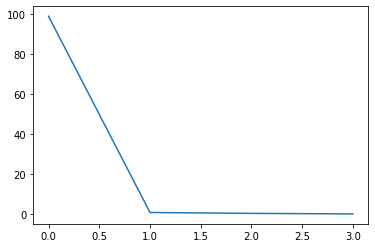

In [1438]:
plt.plot(var_exp)

In [1439]:
from sklearn.decomposition import PCA

pca=PCA(2)
df1_num_pc = pca.fit_transform(df1_num)
df1_num_pc.T

array([[-2.44570045, -2.24266914,  0.59313031, ..., -1.09635296,
        -2.59605582,  2.03386375],
       [ 0.19712529,  0.15042639, -0.09210354, ..., -0.06844457,
         0.21046022, -0.069464  ]])

In [1440]:
df1_pca = pd.DataFrame(df1_num_pc,columns=['pc_size','pc_carat'])
df1_pca.head()

,pc_size,pc_carat
0,-2.445700,0.197125
1,-2.242669,0.150426
2,0.593130,-0.092104
3,-1.631537,0.020623
4,-2.344060,0.158602


In [1441]:
df1_cat['cut'] = df1_cat['cut'].replace({'Ideal':5,'Premium':4,'Very Good':3, 'Good':2, 'Fair':1})
df1_cat['color'] = df1_cat['color'].replace({'J':7,'I':6,'H':5,'G':4,'F':3,'E':2,'D':1})
df1_cat['clarity'] = df1_cat['clarity'].replace({'IF':8,'VVS1':7,'VVS2':6, 'VS1':5, 'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [1442]:
df1_cat.head()

,cut,color,clarity
0,5,2,3
1,4,4,8
2,3,2,6
3,5,3,5
4,5,3,7


In [1443]:
df1_cat=df1_cat.apply(zscore)

In [1444]:
df1_new=pd.concat([df1_cat,df1_pca,df1['price']],axis=1)
df1_new.head()

,cut,color,clarity,pc_size,pc_carat,price
0,0.979367,-0.940777,-0.640136,-2.445700,0.197125,499
1,0.080980,0.231548,2.396449,-2.242669,0.150426,984
2,-0.817407,-0.940777,1.181815,0.593130,-0.092104,6289
3,0.979367,-0.354615,0.574498,-1.631537,0.020623,1082
4,0.979367,-0.354615,1.789132,-2.344060,0.158602,779


In [1445]:
X = df1_new.drop('price', axis=1)

Y = df1_new[['price']]

In [1446]:
# train_indep,test_indep,train_dep,test_dep= train_test_split(X,Y, test_size=.30, random_state=1)

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [1447]:
print('Training set(Independent variables)',X_train.shape)
print('Testing set(Independent variables)',X_test.shape)
print('Training set(Dependent variables)',train_labels.shape)
print('Testing set(Dependent variables)',test_labels.shape)

Training set(Independent variables) (18847, 5)
Testing set(Independent variables) (8078, 5)
Training set(Dependent variables) (18847, 1)
Testing set(Dependent variables) (8078, 1)


In [1448]:
df_tr= pd.concat([X_train,train_labels], axis=1)
df_te=pd.concat([X_test,test_labels], axis=1)
df_tr.head()

,cut,color,clarity,pc_size,pc_carat,price
5029,-1.715794,-0.940777,-1.247452,1.491909,-0.118990,4065
12098,-0.817407,-1.526940,-1.247452,1.141286,-0.134385,5166
20154,-1.715794,1.403873,-0.032819,-0.323656,-0.126778,1708
4712,-1.715794,0.231548,-0.640136,0.161678,-0.193459,2447
2548,0.080980,0.231548,0.574498,1.104276,-0.115159,6618


In [1449]:
var='price ~ cut+color+clarity+pc_size+pc_carat'

In [1450]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= var, data = df_tr).fit()
lm1.params

Intercept    3936.495731
cut           173.532434
color        -568.553928
clarity       838.545389
pc_size      2070.189717
pc_carat     4980.776867
dtype: float64

In [1451]:
print('TRAINING DATASET RESULTS')
print()
print(lm1.summary())

TRAINING DATASET RESULTS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 3.788e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:47:35   Log-Likelihood:            -1.6046e+05
No. Observations:               18847   AIC:                         3.209e+05
Df Residuals:                   18841   BIC:                         3.210e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3936.4957     

The condition number is small, 11.9 well within the recommended value of 40. This might indicate that there is no strong multicollinearity or other numerical problems. R2 value is 91 which says that 91% of the variance in price is explained by the predictors.

In [1452]:
lm2 = smf.ols(formula= var, data = df_te).fit()

In [1453]:
print('TESTING DATASET RESULTS')
print()
print(lm2.summary())

TESTING DATASET RESULTS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.658e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:47:37   Log-Likelihood:                -68780.
No. Observations:                8078   AIC:                         1.376e+05
Df Residuals:                    8072   BIC:                         1.376e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3935.9936     1

In [1454]:
Cond_Tr2= lm1.condition_number
Cond_Tr2

11.949554365815771

In [1455]:
Cond_Te2= lm2.condition_number
Cond_Te2

11.915999233051721

In [1456]:
# MSE Training
mse_tr2 = np.mean((lm1.predict(df_tr.drop('price',axis=1))-df_tr['price'])**2)
mse_tr2

1453324.2130356976

In [1457]:
rmse_tr2=np.sqrt(mse_tr2)
rmse_tr2

1205.5389720103194

In [1458]:
R_Squared_Tr2=((lm1.rsquared)*100).round(2)
print('R-SQUARED VALUE TRAINING:',R_Squared_Tr2)

R-SQUARED VALUE TRAINING: 90.95


In [1459]:
# MSE Testing
mse_te2 = np.mean((lm2.predict(df_te.drop('price',axis=1))-df_te['price'])**2)
mse_te2

1455716.5624074843

In [1460]:
rmse_te2=np.sqrt(mse_te2)
rmse_te1

1222.2502065608612

In [1461]:
R_Squared_Te2=((lm2.rsquared)*100).round(2)
print('R-SQUARED VALUE TRAINING:',R_Squared_Te2)

R-SQUARED VALUE TRAINING: 91.13


In [1463]:
for i,cols in enumerate(X_train.columns):
    print(cols,'---->',vif[i])

cut ----> 1226.6677534276478
color ----> 14.767464527222069
clarity ----> 6.116782917564433
pc_size ----> 8.3826340964369
pc_carat ----> 466.8519141135722


## ITERATION-3

In [1474]:
df1.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779


In [1481]:
df1['cut'] = df1['cut'].replace({'Ideal':5,'Premium':4,'Very Good':3, 'Good':2, 'Fair':1})
df1['color'] = df1['color'].replace({'J':7,'I':6,'H':5,'G':4,'F':3,'E':2,'D':1})
df1['clarity'] = df1['clarity'].replace({'IF':8,'VVS1':7,'VVS2':6, 'VS1':5, 'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [1482]:
df2b=df1[['carat','cut','color','clarity','price']]

In [1483]:
X = df2b.drop('price', axis=1)

Y = df2b[['price']]

In [1484]:
X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [1485]:
from scipy.stats import zscore

X_train= X_train.apply(zscore)
X_test= X_test.apply(zscore)

In [1486]:
regression_model= LinearRegression()
regression_model.fit(X_train,train_labels)

LinearRegression()

In [1487]:
for i,cols in enumerate(X_train.columns):
    print(cols,regression_model.coef_[0][i])

carat 4191.004346464448
cut 170.15199623546914
color -555.9565343127499
clarity 874.9025179029763


In [1488]:
regression_model.intercept_

array([3928.88035231])

In [1512]:
print('Intercept','\n','\n',regression_model.intercept_)
print()
print('Coefficients','\n')
for i,cols in enumerate(X_train.columns):
    print(cols,regression_model.coef_[0][i])

Intercept 
 
 [3928.88035231]

Coefficients 

carat 4191.004346464448
cut 170.15199623546914
color -555.9565343127499
clarity 874.9025179029763


In [1489]:
df_tr= pd.concat([X_train,train_labels], axis=1)
df_te=pd.concat([X_test,test_labels], axis=1)
df_tr.head()

,carat,cut,color,clarity,price
5029,0.638343,-1.716974,-0.942034,-1.243104,4065
12098,0.448538,-0.818090,-1.528825,-1.243104,5166
20154,-0.268501,-1.716974,1.405128,-0.030183,1708
4712,-0.078697,-1.716974,0.231547,-0.636644,2447
2548,0.448538,0.080793,0.231547,0.576277,6618


In [1490]:
var='price ~ carat+cut+color+clarity'

In [1491]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= var, data = df_tr).fit()
lm1.params

print('TRAINING DATASET RESULTS')
print()
print(lm1.summary())

TRAINING DATASET RESULTS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.559e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:50:57   Log-Likelihood:            -1.6078e+05
No. Observations:               18847   AIC:                         3.216e+05
Df Residuals:                   18842   BIC:                         3.216e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3928.8804     

In [1492]:
lm2 = smf.ols(formula= var, data = df_te).fit()
lm2.params

print('TESTING DATASET RESULTS')
print()
print(lm2.summary())

TESTING DATASET RESULTS

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.000e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:50:57   Log-Likelihood:                -68911.
No. Observations:                8078   AIC:                         1.378e+05
Df Residuals:                    8073   BIC:                         1.379e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3953.4443     1

In [1493]:
Cond_Tr3= lm1.condition_number
Cond_Tr3

1.7030581105810771

In [1494]:
Cond_Te3= lm2.condition_number
Cond_Te3

1.7129807938098096

In [1495]:
#MSE training data
predicted_train=regression_model.fit(X_train, train_labels).predict(X_train)
mse_tr3 = metrics.mean_squared_error(train_labels,predicted_train).round(2)
mse_tr3

1504336.84

In [1496]:
rmse_tr3=np.sqrt(metrics.mean_squared_error(train_labels,predicted_train))
rmse_tr3

1226.5141028181379

In [1497]:
# R square on training data
R_Squared_Tr3 = (regression_model.score(X_train,train_labels)*100).round(2)
R_Squared_Tr3

90.64

In [1498]:
# MSE testing data
predicted_test=regression_model.fit(X_train, train_labels).predict(X_test)
mse_te3 = metrics.mean_squared_error(test_labels,predicted_test).round(2)
mse_te3

1508848.69

In [1499]:
rmse_te3=np.sqrt(metrics.mean_squared_error(test_labels,predicted_test))
rmse_te3

1228.3520202520087

In [1500]:
# R square on testing data
R_Squared_Te3=(regression_model.score(X_test,test_labels)*100).round(2)
R_Squared_Te3

90.8

In [1501]:
# Prediction on Train data
y_pred_tr = lm1.predict(df_tr)
y_pred_tr.head()

5029     5748.168201
12098    5431.872840
20154    1703.846089
4712     2621.184611
2548     6197.910904
dtype: float64

In [1502]:
# Prediction on Test data
y_pred_te = lm2.predict(df_te)
y_pred_te.head()

11961     8754.626516
3294      5243.636126
25389    14789.704462
709      12528.456484
8006      9344.064744
dtype: float64

In [1506]:
print()
print('Linear Equation of this dataset')
print()
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')


Linear Equation of this dataset

(3928.88) * Intercept + (4191.0) * carat + (170.15) * cut + (-555.96) * color + (874.9) * clarity + 

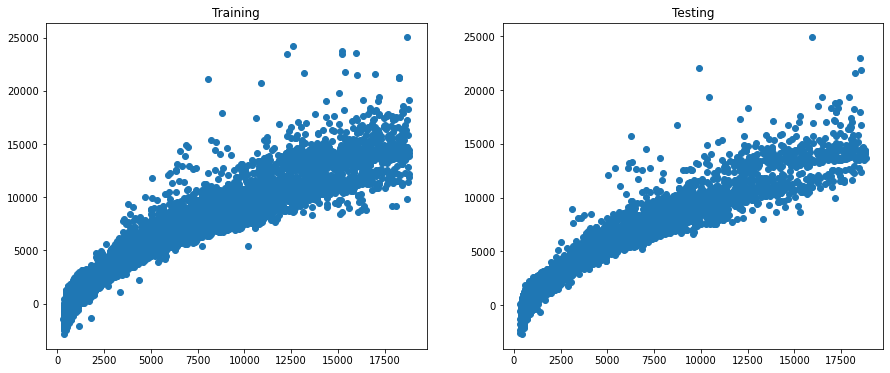

In [1503]:
plt.subplots(figsize= (15,6))
plt.subplot(1,2,1)
plt.scatter(train_labels['price'], y_pred_tr)
plt.title('Training')
plt.subplot(1,2,2)
plt.scatter(test_labels['price'], y_pred_te)
plt.title('Testing')
plt.show()

In [1504]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [1505]:
print('VIF of individual features')
for i,cols in enumerate(X.columns):
    print(cols,'---->',vif[i])

VIF of individual features
carat ----> 3.8347420570393833
cut ----> 8.170091613886509
color ----> 5.744172657161703
clarity ----> 6.4159567459706786


In [1247]:
print()
print('MODEL COMPARISON:')

index=['R_SQUARED_TRAINING','R_SQUARED_TESTING','RMSE_TRAINING','RMSE_TESTING','COND_NO_TRAINING','COND_NO_TESTING']

data = pd.DataFrame(
       
    {'ITERATION 1':[R_Squared_Tr1,R_Squared_Te1,rmse_tr1,rmse_te1, Cond_Tr1,Cond_Te1],
         
     'ITERATION 2':[R_Squared_Tr2,R_Squared_Te2,rmse_tr2,rmse_te2,Cond_Tr2,Cond_Te2],
       
     'ITERATION 3':[R_Squared_Tr3,R_Squared_Te3,rmse_tr3,rmse_te3,Cond_Tr3,Cond_Tr3]}, index=index)

print(data.round(2))



MODEL COMPARISON:
                    ITERATION 1  ITERATION 2  ITERATION 3
R_SQUARED_TRAINING        90.67        90.95        90.64
R_SQUARED_TESTING         90.90        91.13        90.80
RMSE_TRAINING           1223.96      1205.54      1226.51
RMSE_TESTING            1222.25      1206.53      1228.35
COND_NO_TRAINING       13565.09        11.95         1.70
COND_NO_TESTING        13713.83        11.92         1.70
